In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('HR Employee data.csv')

In [3]:
df.head()

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


In [4]:
df.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.00000,...,13423.0,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1.0,1022.222677,2.369366,65.498622,2.46316,...,80.0,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,3875.030667,2.005345,8.126696,356.968483,6.844715,0.0,549.883093,0.941861,17.196420,0.66039,...,0.0,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,1.0,554.000000,2.000000,52.000000,2.00000,...,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1.0,1014.000000,2.000000,65.000000,3.00000,...,80.0,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.00000,...,80.0,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.00000,...,80.0,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


## checking for NULL values

In [5]:
df.isnull()

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
13419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
13420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
13421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False


In [6]:
null_indices = df[df.isnull().any(axis=1)].index
print("Indices of null values:")
print(null_indices)

Indices of null values:
Index([   18,    20,    23,    24,    26,    27,    30,    33,    34,    37,
       ...
       13412, 13413, 13415, 13416, 13417, 13418, 13419, 13420, 13421, 13422],
      dtype='int64', length=10225)


In [7]:
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
EmployeeID                      0
JoiningYear                     0
Age                             0
BusinessTravel                  0
DailyRate                       0
Department                      0
DistanceFromHome                0
EducationField                  0
EmployeeCount                   0
EmployeeNumber                  0
EnvironmentSatisfaction         0
Gender                          0
HourlyRate                      0
JobInvolvement                  0
JobSatisfaction                 0
MaritalStatus                   0
MonthlyIncome                   0
MonthlyRate                     0
NumCompaniesWorked              0
Over18                          0
OverTime                        0
PercentSalaryHike               0
PerformanceRating               0
RelationshipSatisfaction        0
StandardHours                   0
StockOptionLevel                0
TotalWorkingYears               0
TrainingTimesLastYear           0
WorkLifeBa

## checking for class imbalance of response variable

In [8]:
countN, countY = df['Attrition'].value_counts()
print("Ratio of classes is Yes : No = ", countY, ":", countN)

Ratio of classes is Yes : No =  3198 : 10225


C:\Users\chong\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


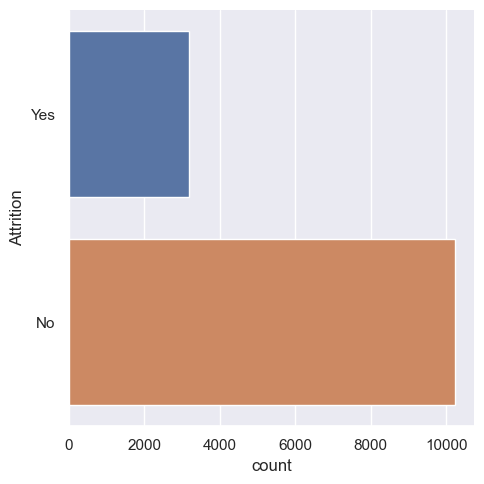

In [9]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'Attrition', data = df, kind = "count")

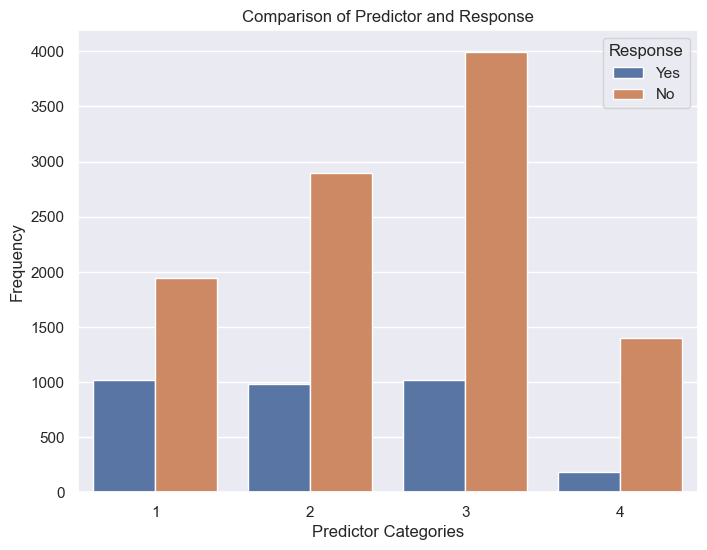

In [10]:
plt.figure(figsize=(8, 6))
sb.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Comparison of Predictor and Response')
plt.xlabel('Predictor Categories')
plt.ylabel('Frequency')
plt.legend(title='Response')
plt.show()

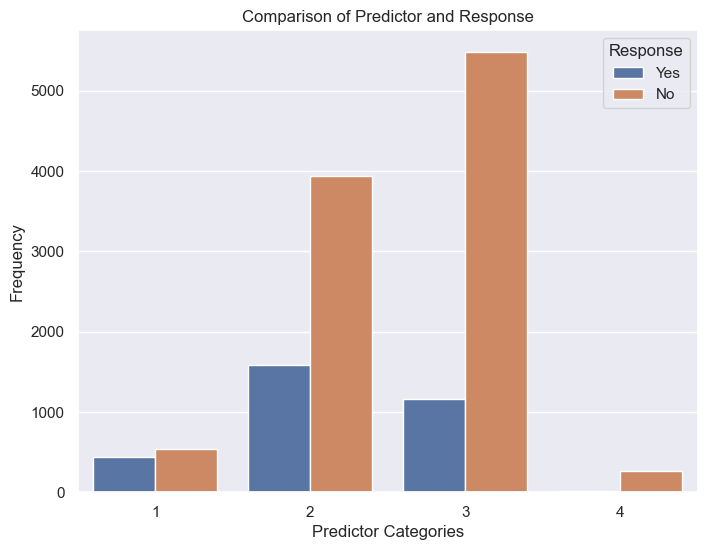

In [11]:
plt.figure(figsize=(8, 6))
sb.countplot(data=df, x='JobInvolvement', hue='Attrition')
plt.title('Comparison of Predictor and Response')
plt.xlabel('Predictor Categories')
plt.ylabel('Frequency')
plt.legend(title='Response')
plt.show()

## OneHotEncoding of categorical predictors

In [12]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
df_cat = df[['OverTime', 'StockOptionLevel', 'office_code', 'BusinessTravel', 'Department', 'MaritalStatus',  ]]
ohe.fit(df_cat)
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(df_cat.columns))

# Check the encoded variables
df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OverTime_No                       13423 non-null  float64
 1   OverTime_Yes                      13423 non-null  float64
 2   StockOptionLevel_0                13423 non-null  float64
 3   StockOptionLevel_1                13423 non-null  float64
 4   StockOptionLevel_2                13423 non-null  float64
 5   StockOptionLevel_3                13423 non-null  float64
 6   office_code_BOS                   13423 non-null  float64
 7   office_code_CAL                   13423 non-null  float64
 8   office_code_MKM                   13423 non-null  float64
 9   office_code_NYC                   13423 non-null  float64
 10  office_code_OTT                   13423 non-null  float64
 11  office_code_PHL                   13423 non-null  float64
 12  offi

In [13]:
df_cat_ohe.head(10)

,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,office_code_BOS,office_code_CAL,office_code_MKM,office_code_NYC,...,BusinessTravel_Travel_Rarely,Department_Corporate Functions,Department_Delivery,Department_HR,Department_Marketing,Department_Product,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Ordinal encoding of 'EducationField'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [15]:
df['EducationField']

0        Doctorate
1        Doctorate
2        Doctorate
3          Diploma
4          Diploma
           ...    
13418      Diploma
13419    Bachelors
13420      Diploma
13421    Bachelors
13422    Doctorate
Name: EducationField, Length: 13423, dtype: object

In [16]:
oe = OrdinalEncoder(categories = [['Diploma', 'Bachelors', 'Masters', 'Doctorate']])
encoded_data = oe.fit_transform(df[['EducationField']])
df['EducationField'] = encoded_data

In [17]:
df['EducationField']

0        3.0
1        3.0
2        3.0
3        0.0
4        0.0
        ... 
13418    0.0
13419    1.0
13420    0.0
13421    1.0
13422    3.0
Name: EducationField, Length: 13423, dtype: float64

In [18]:
df.head(10)

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,3.0,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,3.0,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,3.0,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,0.0,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,0.0,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5
5,100005,2007,57,Travel_Rarely,224,Corporate Functions,21,2.0,1,223,...,14,4,5,3,Yes,2021.0,retiring,Voluntary,CAL,L7
6,100006,2007,50,Travel_Rarely,528,Corporate Functions,2,0.0,1,1485,...,11,3,1,3,Yes,2018.0,retiring,Voluntary,OTT,L6
7,100007,2007,52,Travel_Rarely,590,Corporate Functions,2,0.0,1,1563,...,11,3,1,3,Yes,2018.0,return to school,Voluntary,PHL,L6
8,100008,2007,58,Travel_Rarely,147,Delivery,23,0.0,1,165,...,15,4,6,3,Yes,2022.0,Misconduct,Involuntary,BOS,L3
9,100009,2007,57,Travel_Rarely,305,Marketing,2,2.0,1,823,...,11,5,5,3,Yes,2018.0,long hours,Voluntary,NYC,L5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  float64
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

## Ordinal Encoding of 'JobLevel_updated'

In [20]:
oe = OrdinalEncoder(categories = [['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']])
encoded_data = oe.fit_transform(df[['JobLevel_updated']])
df['JobLevel_updated'] = encoded_data
df.head(10)

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,3.0,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,6.0
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,3.0,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,5.0
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,3.0,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,5.0
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,0.0,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,6.0
4,100004,2007,57,Travel_Rarely,285,Marketing,2,0.0,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,4.0
5,100005,2007,57,Travel_Rarely,224,Corporate Functions,21,2.0,1,223,...,14,4,5,3,Yes,2021.0,retiring,Voluntary,CAL,6.0
6,100006,2007,50,Travel_Rarely,528,Corporate Functions,2,0.0,1,1485,...,11,3,1,3,Yes,2018.0,retiring,Voluntary,OTT,5.0
7,100007,2007,52,Travel_Rarely,590,Corporate Functions,2,0.0,1,1563,...,11,3,1,3,Yes,2018.0,return to school,Voluntary,PHL,5.0
8,100008,2007,58,Travel_Rarely,147,Delivery,23,0.0,1,165,...,15,4,6,3,Yes,2022.0,Misconduct,Involuntary,BOS,2.0
9,100009,2007,57,Travel_Rarely,305,Marketing,2,2.0,1,823,...,11,5,5,3,Yes,2018.0,long hours,Voluntary,NYC,4.0


## we want to remove 'Reason', 'Leavingyear' and 'Relief status' because those variables do not help to predict whether the employee will leave

In [21]:
df = df.drop('LeavingYear', axis=1)
df = df.drop('Reason', axis=1)
df = df.drop('RelievingStatus', axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  float64
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [23]:
df = df.drop(['Gender','Over18','OverTime', 'StockOptionLevel', 'office_code', 'BusinessTravel', 'Department', 'MaritalStatus'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   DailyRate                 13423 non-null  int64  
 4   DistanceFromHome          13423 non-null  int64  
 5   EducationField            13423 non-null  float64
 6   EmployeeCount             13423 non-null  int64  
 7   EmployeeNumber            13423 non-null  int64  
 8   EnvironmentSatisfaction   13423 non-null  int64  
 9   HourlyRate                13423 non-null  int64  
 10  JobInvolvement            13423 non-null  int64  
 11  JobSatisfaction           13423 non-null  int64  
 12  MonthlyIncome             13423 non-null  int64  
 13  MonthlyRate               13423 non-null  int64  
 14  NumCom

## After implementing EDA (eda file in github repo) we concluded to drop the following variables: Over18, StandardHours, EmployeeCount, EmployeeNumber, EmployeeID, Gender, RelationshipSatisfaction

In [25]:
df_response = df['Attrition']

In [26]:
df_num = df[['JoiningYear','Age','DailyRate', 'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobLevel_updated']]
df_ohe = pd.concat([df_num, df_cat_ohe, df_response], 
                           sort = False, axis = 1).reindex(index=df_num.index)

# Check the final dataframe
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JoiningYear                       13423 non-null  int64  
 1   Age                               13423 non-null  int64  
 2   DailyRate                         13423 non-null  int64  
 3   DistanceFromHome                  13423 non-null  int64  
 4   EducationField                    13423 non-null  float64
 5   EnvironmentSatisfaction           13423 non-null  int64  
 6   HourlyRate                        13423 non-null  int64  
 7   JobInvolvement                    13423 non-null  int64  
 8   JobSatisfaction                   13423 non-null  int64  
 9   MonthlyIncome                     13423 non-null  int64  
 10  MonthlyRate                       13423 non-null  int64  
 11  NumCompaniesWorked                13423 non-null  int64  
 12  Perc

## upsampling process of response variable 'Attrition'

In [27]:
# Upsample Bad to match Good
from sklearn.utils import resample

dfNo = df_ohe[df_ohe.Attrition == 'No']
dfYes = df_ohe[df_ohe.Attrition == 'Yes']
 
# Upsample the Bad samples
dfYes_up = resample(dfYes, 
                        replace=True,                     # sample with replacement
                        n_samples=dfNo.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
df_ohe_up = pd.concat([dfNo, dfYes_up])
 
# Check the ratio of the classes
df_ohe_up['Attrition'].value_counts()

Attrition
No     10225
Yes    10225
Name: count, dtype: int64

C:\Users\chong\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


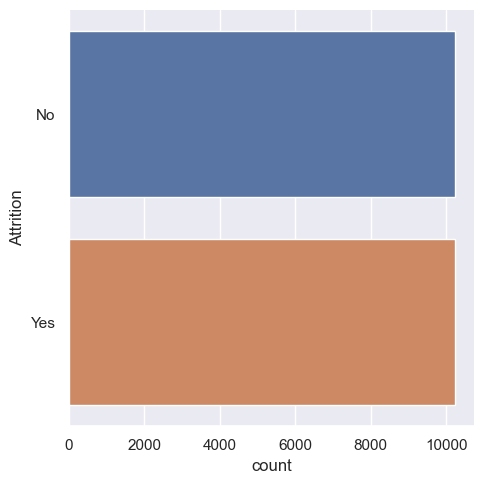

In [28]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'Attrition', data = df_ohe_up, kind = "count")

In [29]:
df_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20450 entries, 18 to 3939
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JoiningYear                       20450 non-null  int64  
 1   Age                               20450 non-null  int64  
 2   DailyRate                         20450 non-null  int64  
 3   DistanceFromHome                  20450 non-null  int64  
 4   EducationField                    20450 non-null  float64
 5   EnvironmentSatisfaction           20450 non-null  int64  
 6   HourlyRate                        20450 non-null  int64  
 7   JobInvolvement                    20450 non-null  int64  
 8   JobSatisfaction                   20450 non-null  int64  
 9   MonthlyIncome                     20450 non-null  int64  
 10  MonthlyRate                       20450 non-null  int64  
 11  NumCompaniesWorked                20450 non-null  int64  
 12  PercentSa

[Text(0.5625, 0.9, 'OverTime_No <= 0.5\ngini = 0.5\nsamples = 15337\nvalue = [7655, 7682]\nclass = Yes'),
 Text(0.3333333333333333, 0.7, 'JobLevel_updated <= 0.5\ngini = 0.247\nsamples = 5283\nvalue = [764, 4519]\nclass = Yes'),
 Text(0.16666666666666666, 0.5, 'JobInvolvement <= 3.5\ngini = 0.107\nsamples = 3601\nvalue = [204, 3397]\nclass = Yes'),
 Text(0.08333333333333333, 0.3, 'JoiningYear <= 2019.5\ngini = 0.1\nsamples = 3579\nvalue = [188, 3391]\nclass = Yes'),
 Text(0.041666666666666664, 0.1, 'gini = 0.033\nsamples = 2084\nvalue = [35, 2049]\nclass = Yes'),
 Text(0.125, 0.1, 'gini = 0.184\nsamples = 1495\nvalue = [153, 1342]\nclass = Yes'),
 Text(0.25, 0.3, 'MonthlyIncome <= 2551.0\ngini = 0.397\nsamples = 22\nvalue = [16, 6]\nclass = No'),
 Text(0.20833333333333334, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Yes'),
 Text(0.2916666666666667, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = No'),
 Text(0.5, 0.5, 'PerformanceRating <= 3.5\ngini = 0.444\nsample

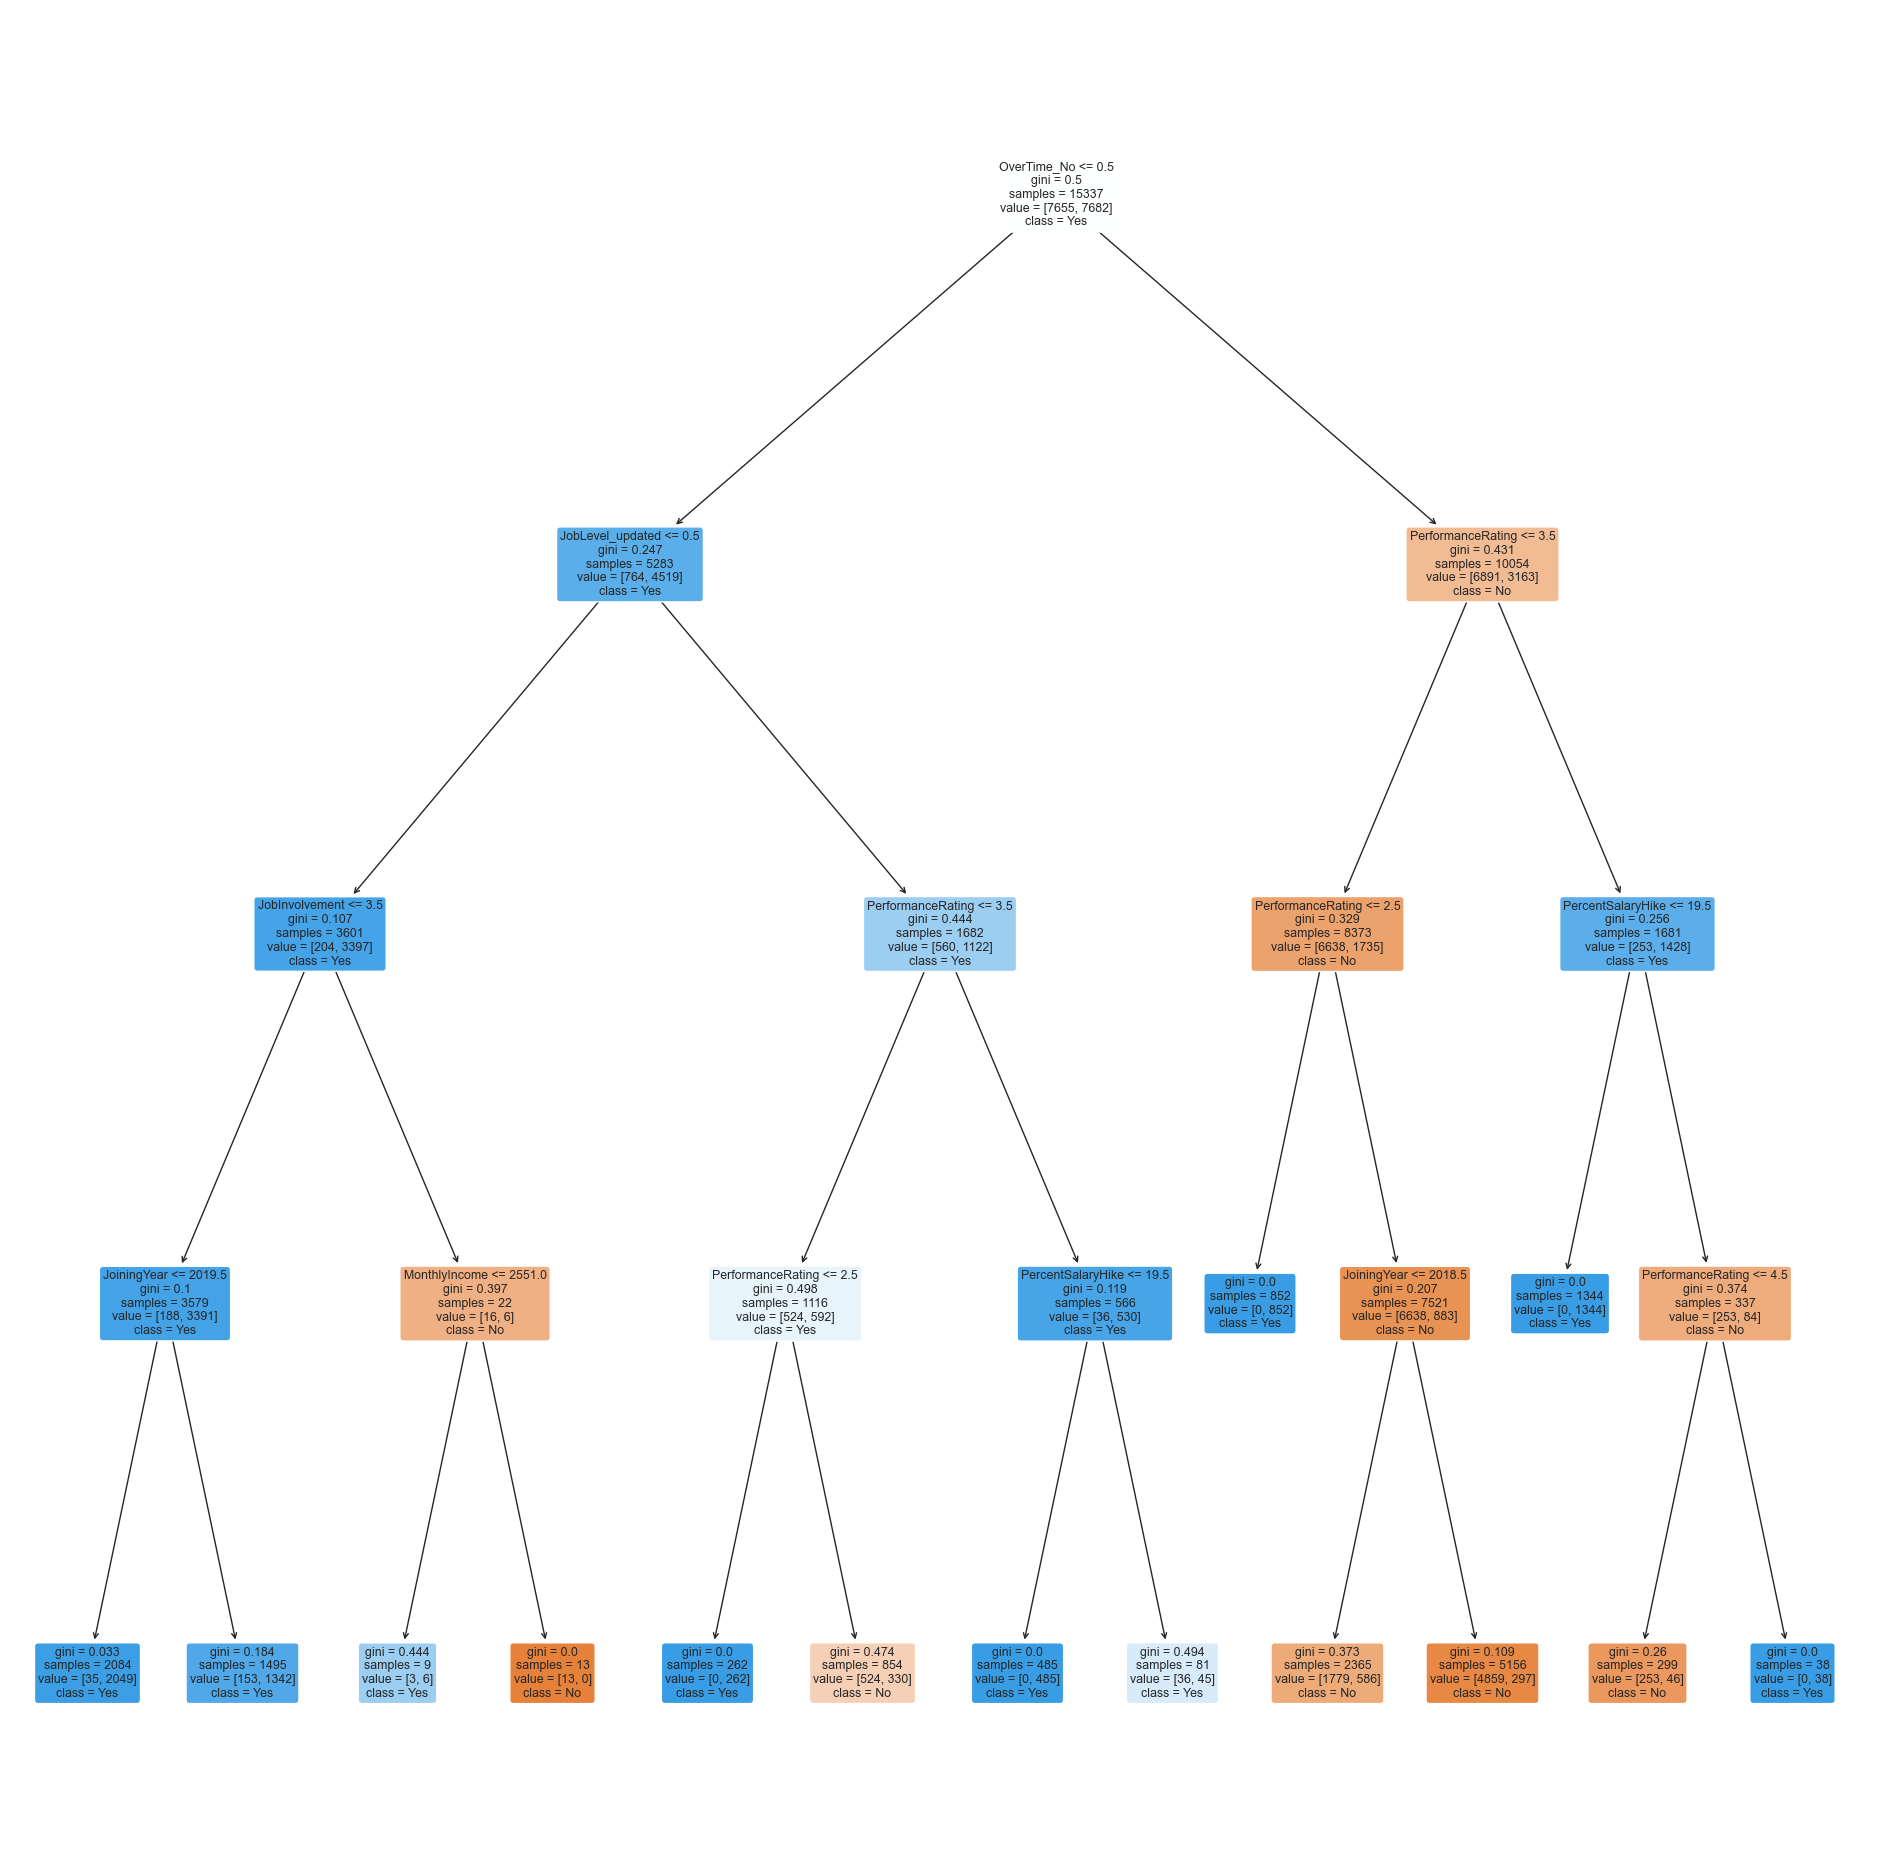

In [30]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(df_ohe_up['Attrition'])
X = pd.DataFrame(df_ohe_up.drop('Attrition', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=list(X_train.columns), 
          class_names=["No","Yes"])



Train Data
Accuracy  :	 0.9031101258394731

TPR Train :	 0.8361103879198125
TNR Train :	 0.9703461789679948

FPR Train :	 0.029653821032005225
FNR Train :	 0.16388961208018746


<Axes: >

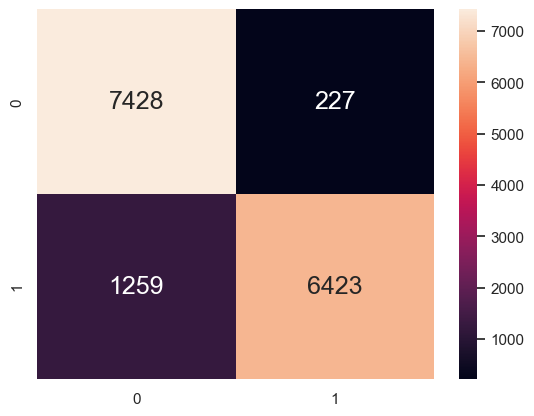

In [31]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9070995501662429

TPR Test :	 0.8446716476602438
TNR Test :	 0.9688715953307393

FPR Test :	 0.0311284046692607
FNR Test :	 0.1553283523397562


<Axes: >

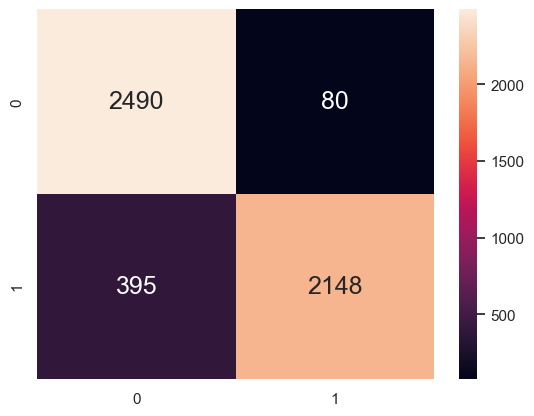

In [32]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 7)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Attrition.ravel())

RandomForestClassifier(max_depth=7)

Train Data
Accuracy  :	 0.9482297711416835

TPR Train :	 0.9315282478521218
TNR Train :	 0.9649902024820379

FPR Train :	 0.03500979751796211
FNR Train :	 0.06847175214787815


<Axes: >

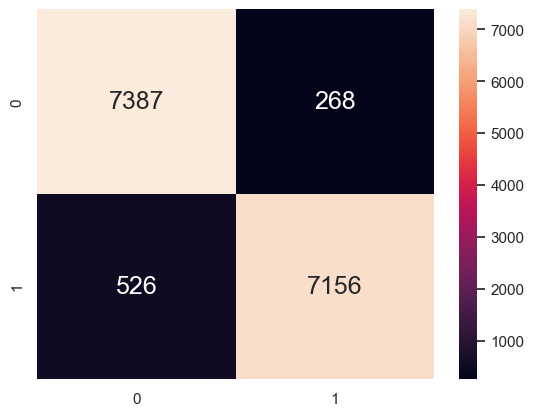

In [34]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9436729904165851

TPR Test :	 0.9288242233582383
TNR Test :	 0.9583657587548639

FPR Test :	 0.041634241245136185
FNR Test :	 0.0711757766417617


<Axes: >

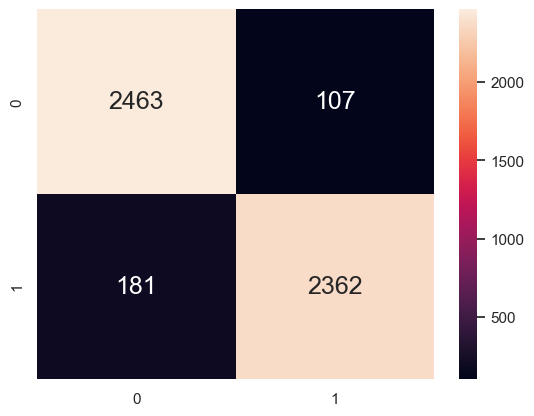

In [35]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Feature importance

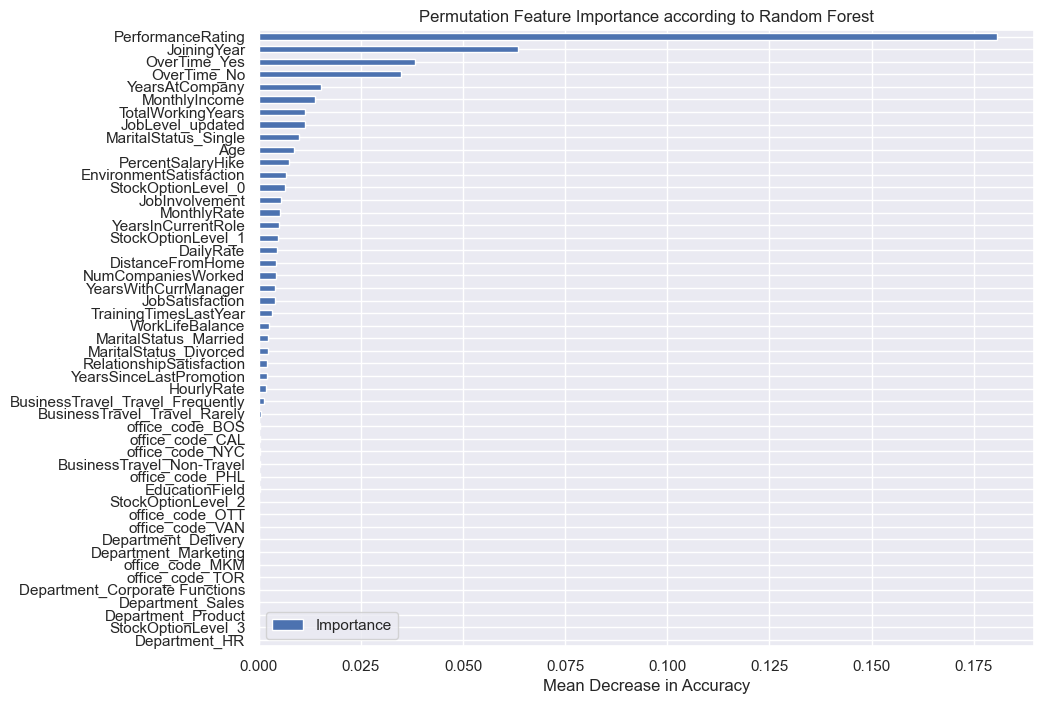

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(rforest, X_train, y_train_pred, n_repeats=10, random_state=42, n_jobs=-1)

# Convert the results into a pandas DataFrame
df = pd.DataFrame(result.importances_mean, index=X_train.columns, columns=["Importance"])

# Sort the DataFrame by importance
df.sort_values(by="Importance", ascending=True, inplace=True)

# Plotting
df.plot(kind='barh', figsize=(10, 8))
plt.title('Permutation Feature Importance according to Random Forest')
plt.xlabel('Mean Decrease in Accuracy')
plt.show()


In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assume X contains your feature data and y contains the target variable (Attrition)
# X should be preprocessed (scaled, encoded) as mentioned earlier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=5)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


C:\Users\chong\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9951100244498777
Classification Report:
              precision    recall  f1-score   support

          No    0.99640   0.99379   0.99509      3060
         Yes    0.99384   0.99642   0.99513      3075

    accuracy                        0.99511      6135
   macro avg    0.99512   0.99511   0.99511      6135
weighted avg    0.99511   0.99511   0.99511      6135



Confusion Matrix:
[[3041   19]
 [  11 3064]]
AUC-ROC: 0.9997505712312025


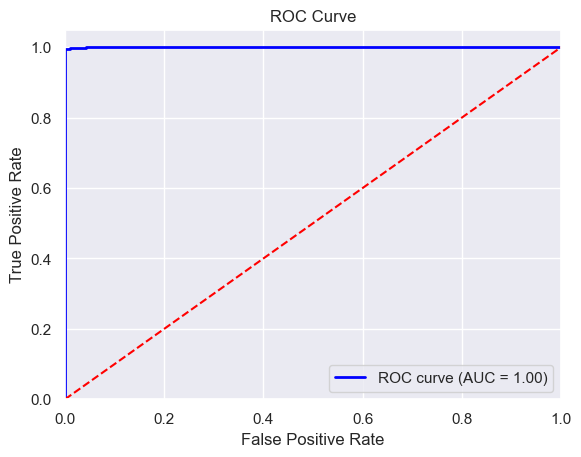

AUC-PR: 0.9997944310328979


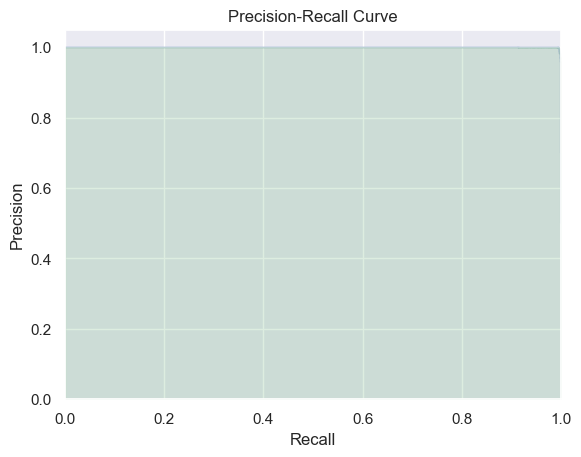

Matthews Correlation Coefficient (MCC): 0.9902232957105659
Kappa Score: 0.9902199280722338


In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt

# Assuming you have already trained and evaluated your MLP classifier as shown earlier

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate ROC curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, mlp_classifier.predict_proba(X_test_scaled)[:, 1], pos_label='Yes')
roc_auc = auc(fpr, tpr)
print('AUC-ROC:', roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, mlp_classifier.predict_proba(X_test_scaled)[:, 1], pos_label='Yes')
pr_auc = average_precision_score(y_test, mlp_classifier.predict_proba(X_test_scaled)[:, 1], pos_label='Yes')
print('AUC-PR:', pr_auc)

# Plot precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

# Calculate MCC and Kappa score
mcc = matthews_corrcoef(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
print('Matthews Correlation Coefficient (MCC):', mcc)
print('Kappa Score:', kappa)
